In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
final = pd.read_csv("FinalEmbeddings.csv")

In [3]:
Embedding = pd.read_csv("embedded.csv")

In [4]:
Embedding.head()

id  total_impressions  total_clicks  total_apply_starts  \
0  181595426                  1             0                   0   
1   30852509                  1             0                   0   
2   59883534                  1             0                   0   
3   31109817                  1             0                   0   
4  227470993                  1             0                   0   

                                        actual_title job_state  \
0  Hiring Registered Nurses / RN | $52/hr | Weeke...        WA   
1                       Physical Therapist - Skilled        ME   
2                            Physical Therapist (PT)        CO   
3  Physician job: A Massachusetts Facility Needs ...        MA   
4    Restaurant Delivery - Sign Up and Start Earning        TN   

          job_city  job_salary  \
0       Washington    108160.0   
1  Boothbay Harbor     65000.0   
2          Boulder    108500.0   
3              NaN         NaN   
4        Nashville         NaN   

                                  advertiser_name employee_count  \
0                                        ShiftMed         50-149   
1                    Wicresoft for AMN Healthcare        150-249   
2  PandoLogic For Interim HealthCare Fort Collins           1-49   
3                         PhysicianCareerJobs.com            NaN   
4  Recruitics_DoorDash_Sponsored Jobs_Digital_Gig          1000+   

                                       cleaned_title  \
0  hiring registered nurses  rn  52hr  weekend sh...   
1                        physical therapist  skilled   
2                              physical therapist pt   
3  physician job a massachusetts facility needs a...   
4     restaurant delivery  sign up and start earning   

                                          Embeddings  
0  [[-0.046258267015218735, -0.24199186265468597,...  
1  [[0.08569194376468658, -0.32442882657051086, 0...  
2  [[-0.23419532179832458, -0.2812983989715576, 0...  
3  [[-0.07266898453235626, 0.2406311333179474, 0....  
4  [[-0.17867262661457062, -0.7092822790145874, -...

In [5]:
import json
Embedding['Embeddings'] = Embedding['Embeddings'].apply(lambda x: np.array(json.loads(x), dtype=np.float16))

In [7]:
filtered_embeddings = Embedding[Embedding['Embeddings'].apply(lambda x: x.shape[0] != 0)]
embedding_matrix = np.vstack(filtered_embeddings['Embeddings'])

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  # Adjust the number of components as needed
reduced_embeddings = pca.fit_transform(embedding_matrix)

/home/jib17006/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jib17006/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jib17006/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jib17006/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/jib170

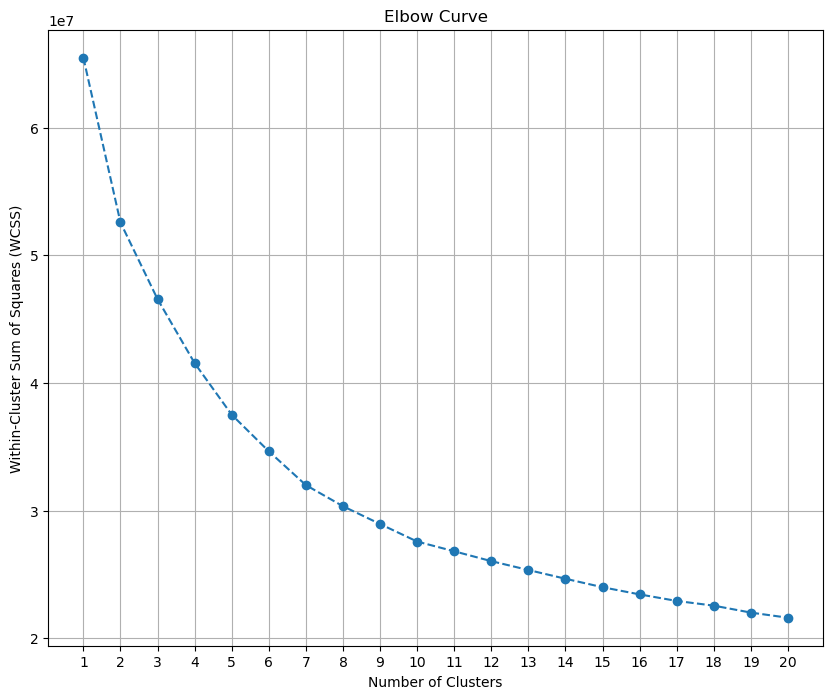

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def calculate_wcss(data):
    wcss = []
    for n_clusters in range(1, 21):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Calculate WCSS for different numbers of clusters
wcss = calculate_wcss(reduced_embeddings)

# Plot the elbow curve
plt.figure(figsize=(10, 8))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

In [15]:
kmeans = KMeans(n_clusters=10, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(embedding_matrix)

filtered_embeddings['cluster'] = kmeans.labels_

/home/jib17006/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_3153581/1617023620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_embeddings['cluster'] = kmeans.labels_


In [16]:
filtered_embeddings['cluster'].value_counts()

cluster
0    486350
8    479767
7    479635
6    414264
9    365478
2    360186
3    299541
5    299058
1    173134
4    154145
Name: count, dtype: int64

In [21]:
filtered_embeddings.columns

Index(['id', 'total_impressions', 'total_clicks', 'total_apply_starts',
       'actual_title', 'job_state', 'job_city', 'job_salary',
       'advertiser_name', 'employee_count', 'cleaned_title', 'Embeddings',
       'cluster'],
      dtype='object')

In [23]:
filtered_embeddings.iloc[11658]

id                                                            164591511
total_impressions                                                     1
total_clicks                                                          0
total_apply_starts                                                    0
actual_title                        Certified Hospital Technician (CNA)
job_state                                                            WA
job_city                                                      Vancouver
job_salary                                                      50600.0
advertiser_name                       JobTarget for Legacy Health (PGM)
employee_count                                                   50-149
cleaned_title                         certified hospital technician cna
Embeddings            [[-0.2115, -0.1494, -0.383, -0.06415, 0.1167, ...
cluster                                                               9
Name: 11658, dtype: object

/tmp/ipykernel_3153581/290160979.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_embeddings['cleaned_title'] = filtered_embeddings['cleaned_title'].astype(str)


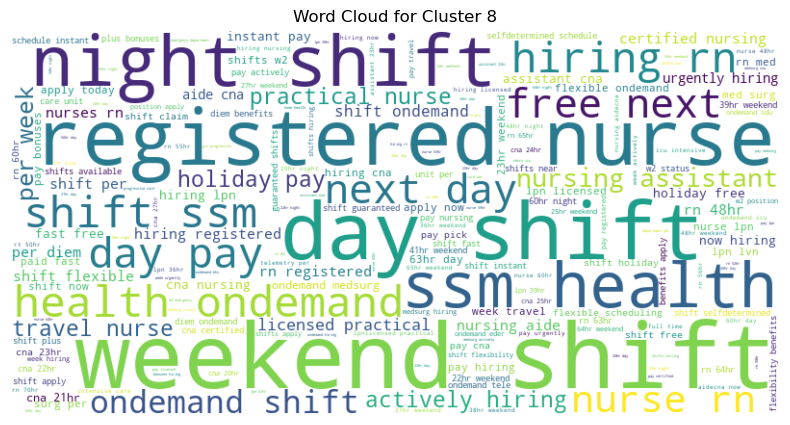

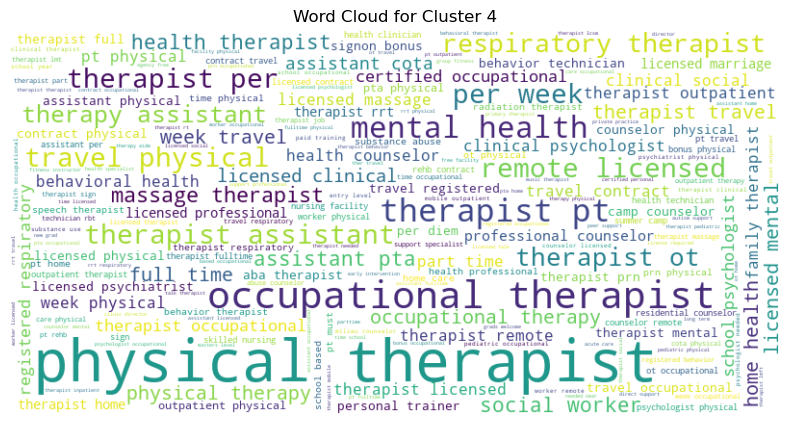

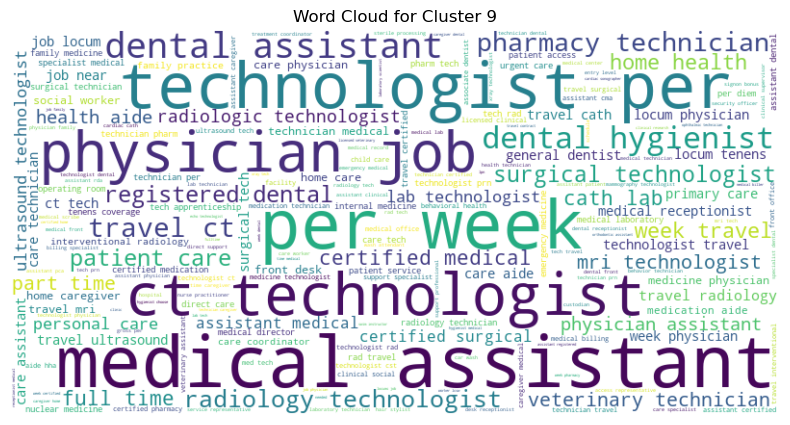

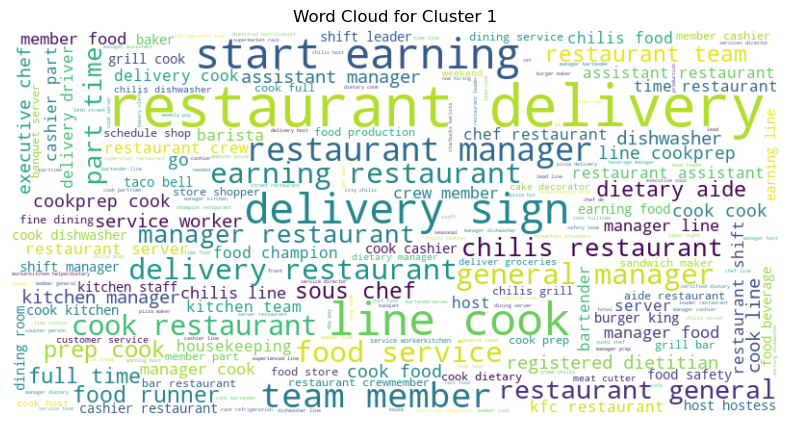

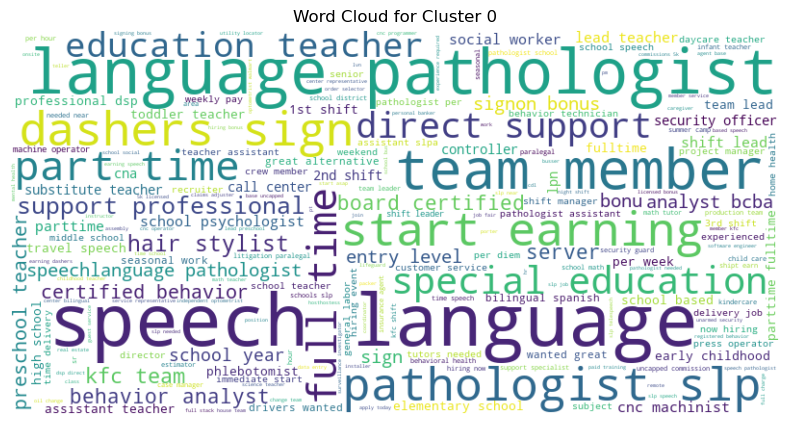

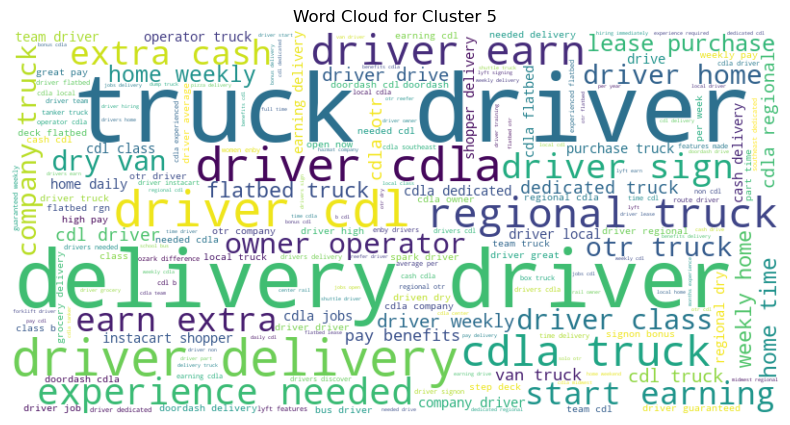

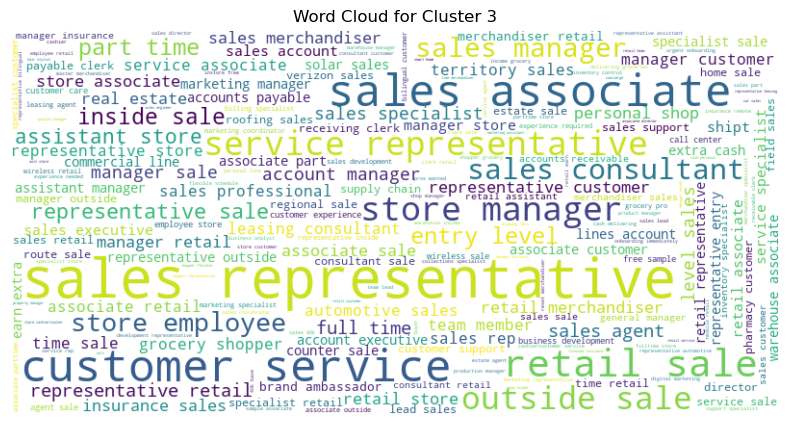

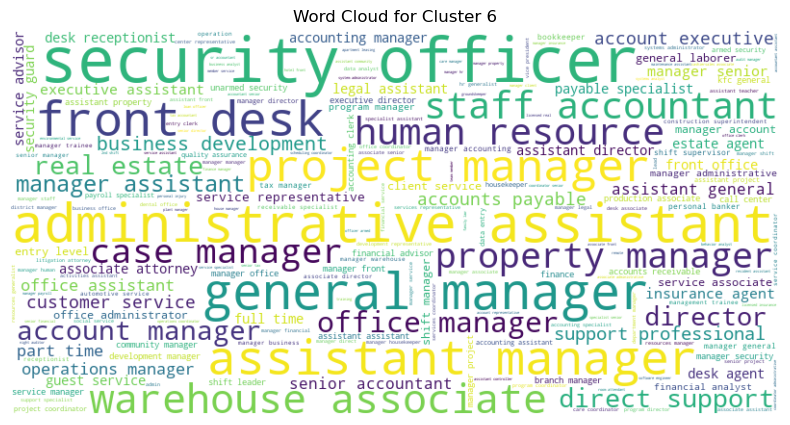

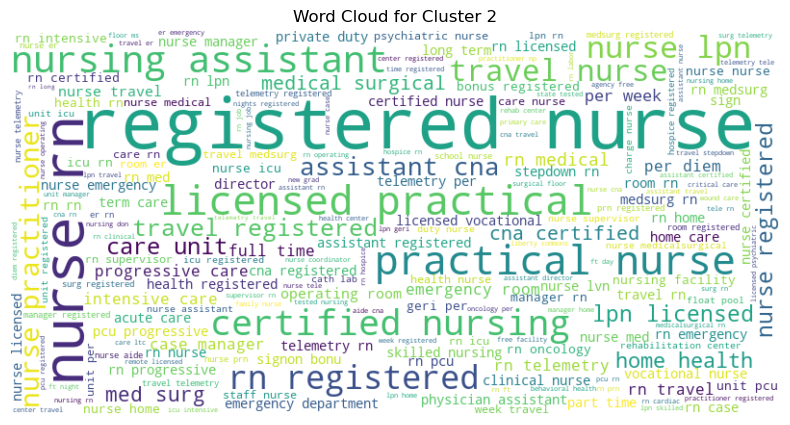

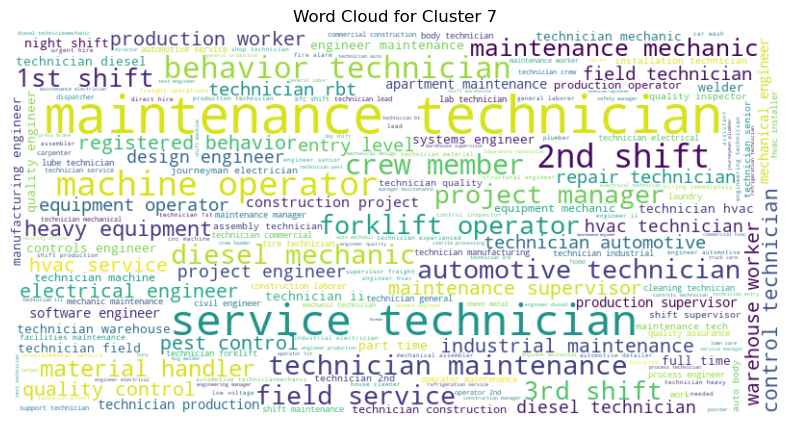

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

def generate_wordcloud(text, cluster_num):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster_num}')
    plt.axis('off')
    plt.show()
filtered_embeddings['cleaned_title'] = filtered_embeddings['cleaned_title'].astype(str)
for cluster in filtered_embeddings['cluster'].unique():
    cluster_data = filtered_embeddings[filtered_embeddings['cluster'] == cluster]
    text = ' '.join(cluster_data['cleaned_title'].tolist())
    generate_wordcloud(text, cluster)